# Non-Negativ Matrix Factorization Model on 1-gram Tokens

In [1]:
import warnings
warnings.simplefilter('ignore')
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pyLDAvis
import pyLDAvis.sklearn
import seaborn as sns
from src.models.build_topic_model import show_topics, drop_topics, get_topic_patterns, sparse_argsort

C:\Users\poorj\Projects\CCC-Topic-Modeling\env\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


### Load dataset

In [2]:
path_to_data = Path('../data')
df = pd.read_csv(path_to_data / 'processed' /'tokenized1gram_data.csv', converters={'tokenized': eval, 'tokenized_mults': eval, 'tokenized_mults_extr': eval})

### Fit model for full token set (incl. extra stops)

In [3]:
tfidf = TfidfVectorizer(analyzer='word', tokenizer=lambda doc: doc, preprocessor = lambda doc: doc, token_pattern=None)
dtm_tfidf = tfidf.fit_transform(df['tokenized_mults'])
vocab = np.array(tfidf.get_feature_names())

nmf_tfidf = NMF(init='random', n_components=6, max_iter=100, random_state = 0)
nmf_tfidf.fit(dtm_tfidf)

pyLDAvis.enable_notebook()
vis_nmf = pyLDAvis.sklearn.prepare(nmf_tfidf, dtm_tfidf, tfidf)
vis_nmf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.076174  0.027879       1        1  22.047664
2     -0.038425  0.063448       2        1  19.961473
1      0.083982 -0.138478       3        1  16.997011
0      0.007428 -0.126556       4        1  14.847283
5     -0.262575  0.025989       5        1  13.833141
4      0.133417  0.147718       6        1  12.313428, topic_info=            Term       Freq      Total Category  logprob  loglift
666        csekk  45.000000  45.000000  Default  30.0000  30.0000
1911  hozzájárul  26.000000  26.000000  Default  29.0000  29.0000
350         bank  21.000000  21.000000  Default  28.0000  28.0000
1976       hónap  31.000000  31.000000  Default  27.0000  27.0000
101      ajánlat  22.000000  22.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
818          díj   5.471199  34.887808   Topic6  -5.3577   0.2418
859          egy   4.146780  15.909119   Topic6  -5.6349   0.7499
1868      hogyha   4.361398  24.994683   Topic6  -5.5844   0.3486
3422        mond   4.584513  37.680117   Topic6  -5.5345  -0.0120
47            ad   4.421930  32.039762   Topic6  -5.5707   0.1141

[541 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
2         2  1.321172             157es
47        1  0.124845                ad
47        2  0.218479                ad
47        3  0.187267                ad
47        4  0.093634                ad
...     ...       ...               ...
5486      1  0.922071            ügyfél
5486      3  0.061471            ügyfél
5490      5  1.039443      ügyfélprofil
5492      2  0.683806  ügyfélszolgálati
5498      5  1.000605            ügynök

[740 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 6, 5])

In [4]:
W1 = nmf_tfidf.fit_transform(dtm_tfidf)
H1 = nmf_tfidf.components_

show_topics(H1, num_top_words = 8, vocab = vocab)

['díj ugye évforduló biztosítás éves ft szerződés fizet',
 'csekk küld fizet tud befizet kap hónap hó',
 'tud cím email jelszó küld felület ön online',
 'tud szia utal mond szerződés ügyfél összeg lát',
 'bank hónap csoportos megbízás levon tud von terhelés',
 'hozzájárul ajánlat adat köszön elérhetőség szerződés megkeres akció']

### Fit model for cleaned token set (excl. extra stops)

In [3]:
tfidf = TfidfVectorizer(analyzer='word', tokenizer=lambda doc: doc, preprocessor = lambda doc: doc, token_pattern=None)
dtm_tfidf = tfidf.fit_transform(df['tokenized_mults_extr'])
vocab = np.array(tfidf.get_feature_names())

nmf_tfidf = NMF(init='random', n_components=8, max_iter=100, random_state = 0)
nmf_tfidf.fit(dtm_tfidf)

pyLDAvis.enable_notebook()
vis_nmf = pyLDAvis.sklearn.prepare(nmf_tfidf, dtm_tfidf, tfidf)
vis_nmf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.032268  0.099566       1        1  15.247224
2      0.045740  0.069953       2        1  14.208631
7      0.094510 -0.077073       3        1  13.675186
0      0.043586  0.013260       4        1  12.667799
6     -0.096170 -0.085960       5        1  11.966842
5      0.135010  0.167933       6        1  11.602788
4     -0.282608  0.018452       7        1  11.350490
1      0.092200 -0.206132       8        1   9.281041, topic_info=            Term       Freq      Total Category  logprob  loglift
654        csekk  47.000000  47.000000  Default  30.0000  30.0000
1877  hozzájárul  26.000000  26.000000  Default  29.0000  29.0000
2924       levél  37.000000  37.000000  Default  28.0000  28.0000
339         bank  21.000000  21.000000  Default  27.0000  27.0000
2150      jelszó  20.000000  20.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
5298      összeg   4.403226  32.517256   Topic8  -5.1742   0.3778
317    azonosító   3.207383  18.799308   Topic8  -5.4911   0.6088
4708        utal   3.456631  28.818806   Topic8  -5.4162   0.2565
47            ad   3.462711  32.735396   Topic8  -5.4145   0.1308
526    biztosító   2.810000  11.337487   Topic8  -5.6233   0.9823

[619 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
2         5  1.404566            157es
12        8  1.952471  2400dunaújváros
47        1  0.183288               ad
47        2  0.091644               ad
47        3  0.061096               ad
...     ...       ...              ...
5357      6  0.122089           ügyfél
5361      7  0.963195     ügyfélprofil
5362      2  0.323198  ügyfélszolgálat
5362      5  0.484797  ügyfélszolgálat
5369      7  1.030202           ügynök

[967 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 8, 1, 7, 6, 5, 2])

In [4]:
W1 = nmf_tfidf.fit_transform(dtm_tfidf)
H1 = nmf_tfidf.components_

show_topics(H1, num_top_words = 12, vocab = vocab)

['tud szerződés név információ meghatalmazás ért telefon biztosítás ad szerződő segít szám',
 'bank csoportos megbízás levon von beszedési levonás terhelés tud beszedés számla díj',
 'díj évforduló éves biztosítás szerződés fizet következő negyedéves összeg első kötelező nap',
 'levél kap küld biztosítás email hátralék néz cím értesítés ért türelem nap',
 'hozzájárul ajánlat adat elérhetőség akció megkeres szerződés álló ügynök kezelt általa személyes',
 'csekk befizet fizet küld kap negyedév tud negyedéves következő darab első csekken',
 'jelszó tud cím email felület online felhasználónév regisztráció mail küld belép kukac',
 'utal összeg közlemény lát számlaszám pénz utalás ír ügyfél számla kolléga tud']

* 0 - adatvédelmi okokból csak a szerződőnek info 
* 1 - csoportos beszedés nem működött  
* 2 - évfordulóval kapcsolatos díjváltozást nem érti
* 3 - levél vagy email a hátralékról (inter, díjfelszólító)
* 4 - marketing hozzájárulás
* 5 - csekkes befizetés probléma
* 6 - online irányba terelés
* 7 - egyedi utalásos probléma

In [6]:
print(W1.shape, H1.shape, vocab.shape)

(1000, 8) (8, 5408) (5408,)


In [8]:
top2 = pd.DataFrame(W1.argsort()[:, 6:][:, ::-1], columns = ['Topic1', 'Topic2'])
df.join(top2).loc[:, ['file_name', 'text', 'Topic1', 'Topic2']].join(pd.DataFrame(W1)).to_csv(path_to_data / 'processed' / '1gram_inspect.csv')

#### Drop irrelevant topics

In [5]:
W1_clean , H1_clean = drop_topics(W1, H1, drop_list = [0,4,6])
show_topics(H1_clean, num_top_words = 15, vocab = vocab)

['bank csoportos megbízás levon von beszedési levonás terhelés tud beszedés számla díj felhatalmazás lát havi',
 'díj évforduló éves biztosítás szerződés fizet következő negyedéves összeg első kötelező nap casco év bónusz',
 'levél kap küld biztosítás email hátralék néz cím értesítés ért türelem nap lát lakcím nincsen',
 'csekk befizet fizet küld kap negyedév tud negyedéves következő darab első csekken érkezik kiegészítő felad',
 'utal összeg közlemény lát számlaszám pénz utalás ír ügyfél számla kolléga tud szerződés könyvel nap']

In [6]:
topics_df = pd.DataFrame(show_topics(H1_clean, num_top_words = 10, vocab = vocab), columns = ['top_words'])
topics_df['topic_name'] = ['csoportos', 'évforduló', 'hátralék', 'csekk', 'utalás']
topics_df

,top_words,topic_name
0,bank csoportos megbízás levon von beszedési le...,csoportos
1,díj évforduló éves biztosítás szerződés fizet ...,évforduló
2,levél kap küld biztosítás email hátralék néz c...,hátralék
3,csekk befizet fizet küld kap negyedév tud negy...,csekk
4,utal összeg közlemény lát számlaszám pénz utal...,utalás


In [9]:
W1_clean.shape

(1000, 5)

In [10]:
pd.DataFrame(W1_clean.argmax(axis = 1), columns = ['topic']).groupby(['topic'])['topic'].count()

topic
0    145
1    229
2    237
3    180
4    209
Name: topic, dtype: int64

#### Topic patterns and frequencies

In [7]:
mask = W1_clean >= 0
masked_dtm = np.where(mask, W1_clean, 0)
topic_names = ['csoportos', 'évforduló', 'hátralék', 'csekk', 'utalás']

# Extract topic patterns
topic_patterns = [sparse_argsort(i) for i in masked_dtm]
topic_patterns = [np.array(topic_names)[i] for i in topic_patterns]


In [7]:
topic_patterns = get_topic_patterns(W1_clean, ['csoportos', 'évforduló', 'hátralék', 'csekk', 'utalás'], threshold = 0.025)

In [8]:
topic_patterns

,pattern,count,pct,pct roll
0,"(utalás,)",110,0.110,0.110
1,(),96,0.096,0.206
2,"(évforduló,)",93,0.093,0.299
3,"(hátralék,)",87,0.087,0.386
4,"(csekk,)",75,0.075,0.461
...,...,...,...,...
69,"(utalás, csoportos, csekk)",1,0.001,0.996
70,"(hátralék, utalás, csekk, évforduló)",1,0.001,0.997
71,"(utalás, csekk, évforduló)",1,0.001,0.998
72,"(hátralék, évforduló, csekk, csoportos)",1,0.001,0.999


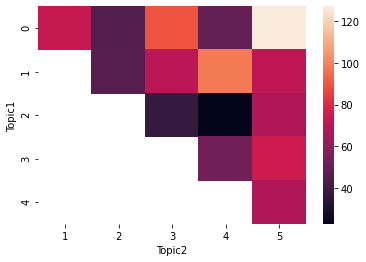

In [53]:
top2 = pd.DataFrame(np.sort(W1_clean.argsort()[:, 4:][:, ::-1]), columns = ['Topic1', 'Topic2'])\
                .groupby(['Topic1', 'Topic2']).size().reset_index(name = 'count')
top2

top2_wide=top2.pivot_table(index='Topic1', columns='Topic2', values='count')
sns.heatmap(top2_wide)

#### Classify calls